In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# LOADING THE DATASET,SETTING THE INDEX TO 

df = pd.read_csv(filepath_or_buffer="C:/Users/91626/Desktop/monthly-beer-production-in-austr.csv",
                 index_col=0)
df.index = pd.to_datetime(df.index,format='%Y-%m')
df.index.rename("Time",inplace=True)
df.asfreq('MS')
df.head()


,Monthly beer production
Time,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [4]:
df.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


## CREATING NEW FEATREES TO UNDERSTAND THE DATA BETTER


In [5]:
# SINCE THE GIVEN DATA IS IN BARREL WE WILL CONVERT IT TO LITRES 
# 1 BARREL = 117.35 LITRES
df["Monthly beer production"] = df["Monthly beer production"].apply(lambda x : x * 117.35)
df.rename({"Monthly beer production":"Beer Production(ltr)"},axis=1,inplace=True)
df["Month"] = df.index.month
df["Quarter"] = df.index.quarter
df["Year"] = df.index.year


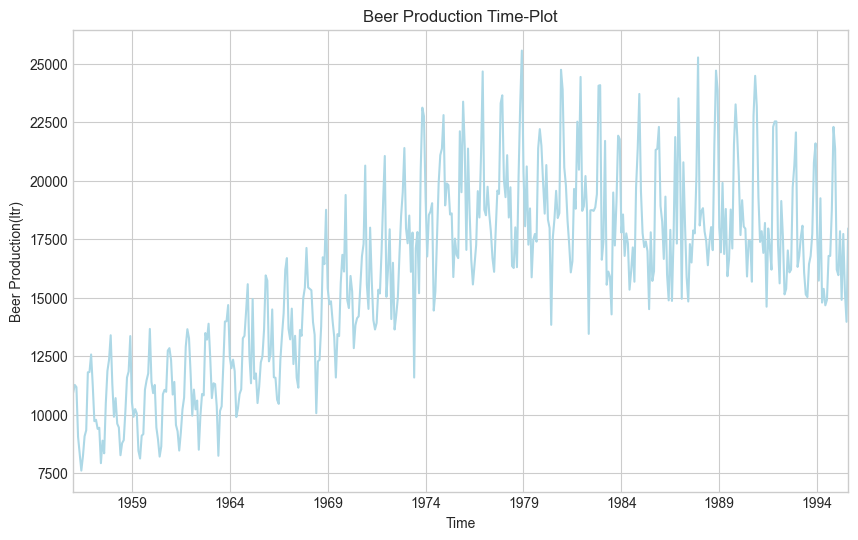

In [6]:
# PLOTTING THE TIME SERIES USING SEABORN BRIGHT STYLE FOR TEH PLOTS
plt.style.use(style = "seaborn-v0_8-whitegrid")
df["Beer Production(ltr)"].plot(title="Beer Production Time-Plot",figsize=(10,6),color='lightblue')
plt.xlabel("Time")
plt.ylabel("Beer Production(ltr)")
plt.show()

## Distribution Plots

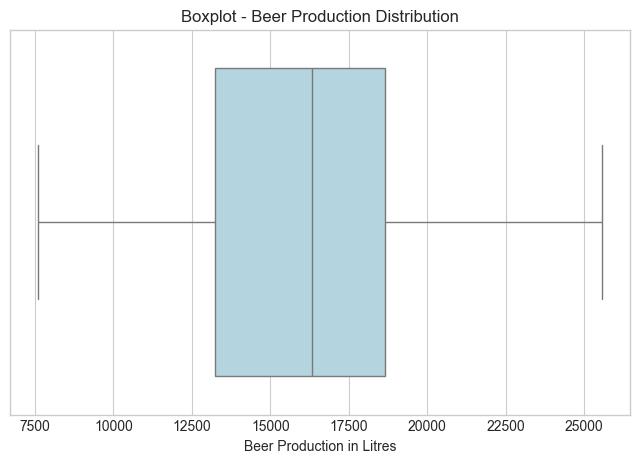

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Beer Production(ltr)',color='lightblue')
plt.xlabel('Beer Production in Litres')
plt.title(f'Boxplot - Beer Production Distribution')
plt.show()


In [22]:
# THE DATA SEEMS TO BE NORMALLY DISTRIBUTE WITH THE MEDIAN BEER PRODUCTION TO BE AROUND 16250 RS ALSO THERE ARE NOT ANY OUTLIERS IN THE SERIES

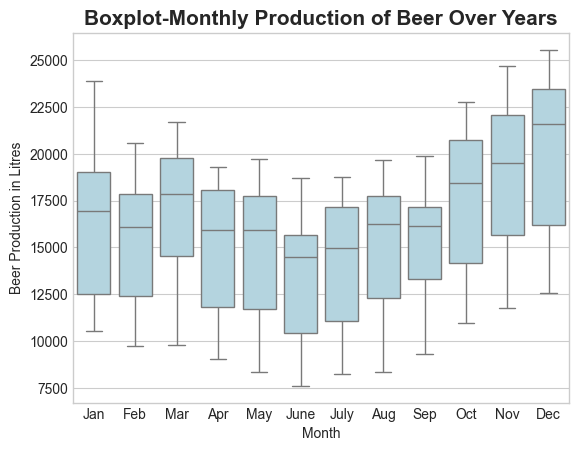

In [8]:
plt.style.use("tableau-colorblind10")
sns.boxplot(x='Month' ,y='Beer Production(ltr)',data=df,color='lightblue')
plt.title("Boxplot-Monthly Production of Beer Over Years",fontweight="bold",fontsize=15)
plt.ylabel("Beer Production in Litres")
plt.xticks(ticks=list(range(0,12)),labels=["Jan","Feb","Mar","Apr","May","June","July","Aug","Sep","Oct","Nov","Dec"])
plt.show()

In [24]:
# THERE SEEMS A CLEAR INCREASE IN THE PRODUCTION FROM THE MONTH OF JUNE TILL DECEMBER PROBABLY DUE TO WINTERS IN THE AUSTRILIA
# HIGHEST IN DECEMBER CAN BE ATTRIBUTED TO CHRISTMASN,NEW-YEAR AND OTHER FESTIVITIES AND THE COLD WINTERS

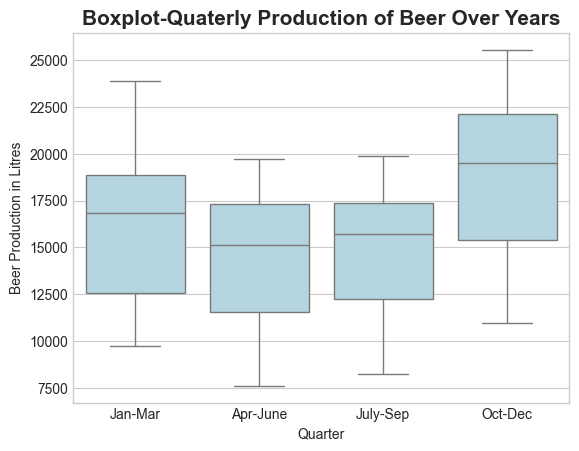

In [25]:
sns.boxplot(x='Quarter' ,y='Beer Production(ltr)',data=df,color='lightblue')
plt.title("Boxplot-Quaterly Production of Beer Over Years",fontweight="bold",fontsize=15)
plt.ylabel("Beer Production in Litres")
plt.xticks(ticks=list(range(0,4)),labels=["Jan-Mar","Apr-June","July-Sep","Oct-Dec"])
plt.show()

In [ ]:
# Variations in seasonal consumer demand, weather conditions, and market trends influence higher beer production in the last quarter and lower production in two mid-quarters of the year.

In [27]:
# THERE IS A CLEAR INCREASING TREND OVER THE YEARS IN PRODUCTION OF BEER 
# THE UPWARRD TREND CAN BE SEEN STARTED FROM 1964 ONWARDS AND PRODUCTION PEAKED IN 1979 
# THE INCREASE IN BEER PRODUCTION FROM 1956 TO 1976 COULD BE ATTRIBUTED TO POST-WAR ECONOMIC GROWTH AND CHANGING CONSUMER PREFERENCES.
# THE STABLE TREND FROM 1976 TO 1996 SUGGESTS A MATURE MARKET WITH CONSISTENT DEMAND AND PRODUCTION PRACTICES.

## Monthly,quaterly and half yearly line plots

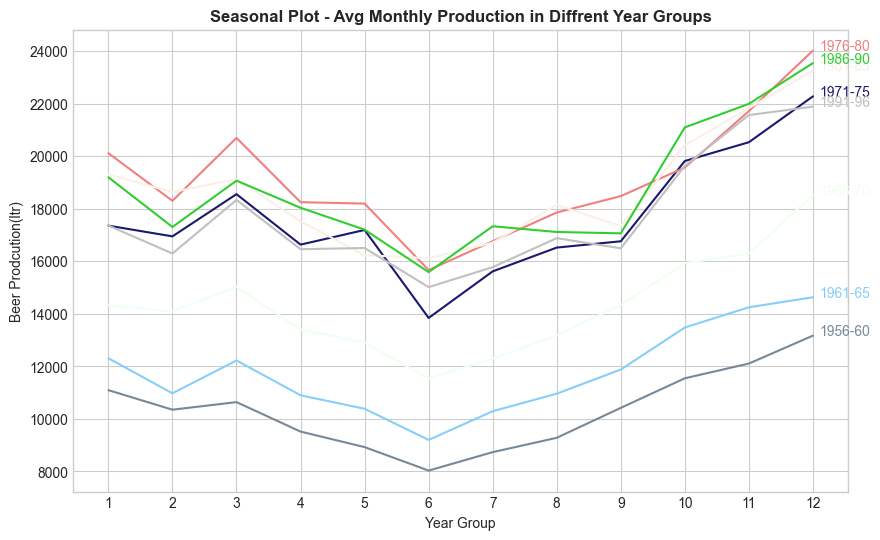

In [12]:
years = len(list(df.Year.unique()))  # Adjust this range based on your actual data
df['Year_Group'] = pd.cut(df.Year, bins=8,labels=["1956-60","1961-65","1966-70","1971-75","1976-80",'1981-85','1986-90',"1991-96"])
Year_Group = list(df.Year_Group.unique())
colors = np.random.choice(list(plt.cm.colors.cnames.keys()),size=len(list(df.Year_Group.unique())),replace=False)
df_YGplot = df[["Beer Production(ltr)","Month","Year_Group"]].groupby(by=["Month","Year_Group"],observed=True).mean()
df_YGplot = df_YGplot.reset_index()
plt.figure(figsize=(10,6))
for index,year_group in enumerate(Year_Group):
    if  index >=0:
        plt.plot('Month','Beer Production(ltr)',data=df_YGplot.loc[df_YGplot.Year_Group == year_group],color=colors[index],label=year_group)
        plt.text(x=df_YGplot['Month'].loc[df_YGplot.Year_Group == year_group].max() + 0.1,
                 y=df_YGplot['Beer Production(ltr)'].loc[df_YGplot.Year_Group == year_group][-1:].values[0],
                 s=year_group,
                 color=colors[index])
plt.gca().set(xlabel="Month",ylabel="Beer Production(ltr)")
plt.xticks(list(range(1,13)))
plt.ylabel("Beer Prodcution(ltr)")
plt.xlabel("Year Group")
plt.title("Seasonal Plot - Avg Monthly Production in Diffrent Year Groups",fontweight="bold",fontsize=12)
plt.show()

In [28]:
# THERE IS A CLEAR ALTERNATE UP AND DOWN TREND ALTERNATE MONTHS ATTRIBUTED TO :
  # FLUCTUATIONS IN ECONOMIC CONDITIONS, CHANGES IN CONSUMER PREFERENCES, REGULATORY SHIFTS.
  # THE EFFECT OF FIRST-MONTH PRODUCTION MEETING DEMAND FOR THE FOLLOWING MONTH MAY HAVE INFLUENCED THE ALTERNATING MONTHLY TRENDS IN BEER PRODUCTION FROM 1956 TO 1996.

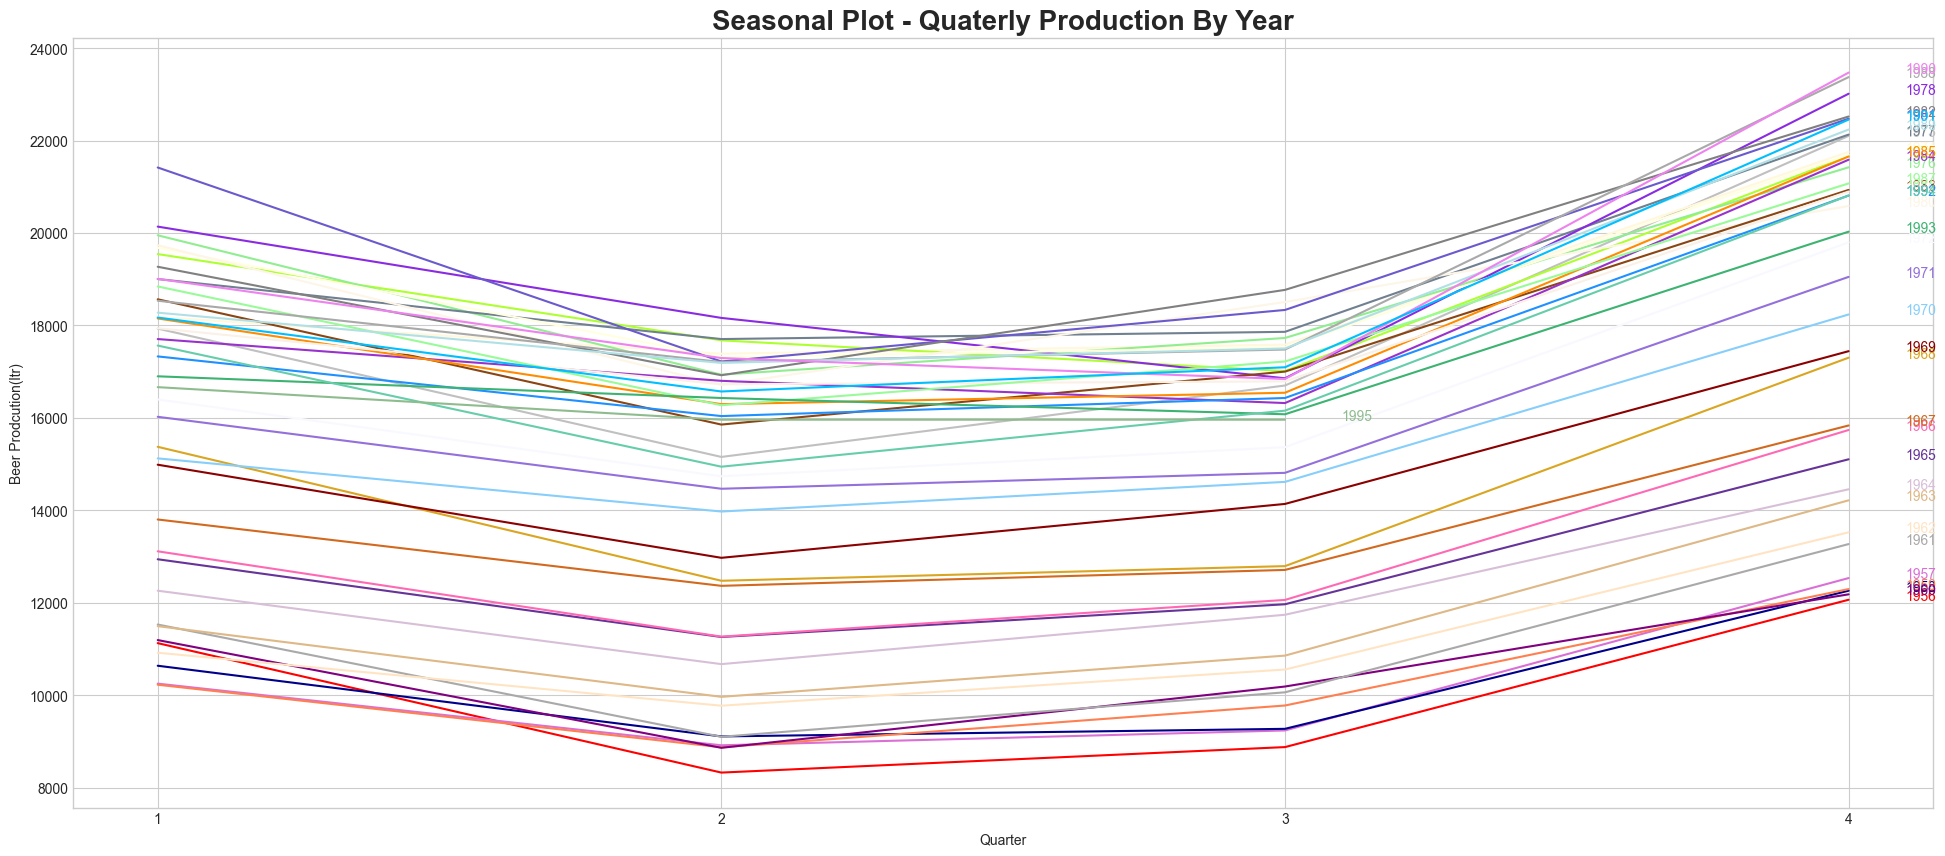

In [13]:
years = list(df.Year.unique())
colors = np.random.choice(list(plt.cm.colors.cnames.keys()),size=len(list(df.Year.unique())),replace=False)
df_QYplot = df[["Beer Production(ltr)","Quarter","Year"]].groupby(by=["Quarter","Year"]).mean()
df_QYplot = df_QYplot.reset_index()
plt.figure(figsize=(24,10))
for index,year in enumerate(years):
    if  index >=0:
        plt.plot('Quarter','Beer Production(ltr)',data=df_QYplot.loc[df_QYplot.Year == year],color=colors[index],label=year)
        plt.text(x=df_QYplot['Quarter'].loc[df_QYplot.Year == year].max() + 0.1,
                 y=df_QYplot['Beer Production(ltr)'].loc[df_QYplot.Year == year][-1:].values[0],
                 s=year,
                 color=colors[index])
plt.gca().set(xlabel="Month",ylabel="Beer Production(ltr)")
plt.xticks(list(range(1,5)))
plt.ylabel("Beer Prodcution(ltr)")
plt.xlabel("Quarter")
plt.title("Seasonal Plot - Quaterly Production By Year",fontweight="bold",fontsize=20)
plt.show()




In [29]:
# CONFIRMS THE ABOVE QUATERLY DISTRIBUTION PLOTS

# 

<Figure size 1600x800 with 0 Axes>

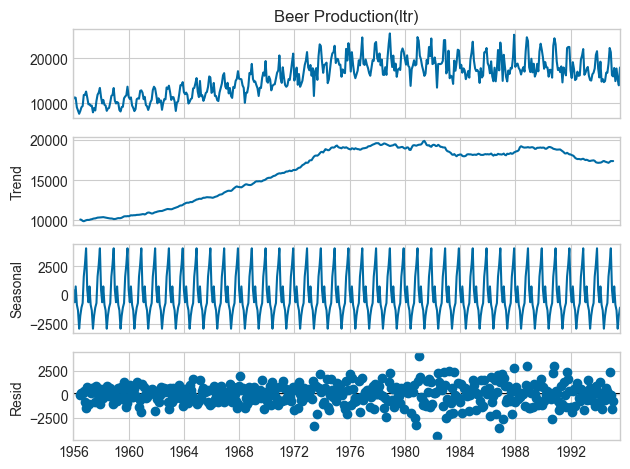

In [30]:
plt.figure(figsize=(16,8))
from statsmodels.tsa.seasonal import seasonal_decompose
df_decomposed = seasonal_decompose(df["Beer Production(ltr)"],model="additive")
df_decomposed.plot()
plt.show()

In [32]:
# THE RESIDUE SEEMS TO BE RANDOMLY DISTRIBUTED WITHOUT ANY PATTERNS ND THERS SEEMS TO BE A 12 MONTHS SEASONALITY IN THE SERRIES

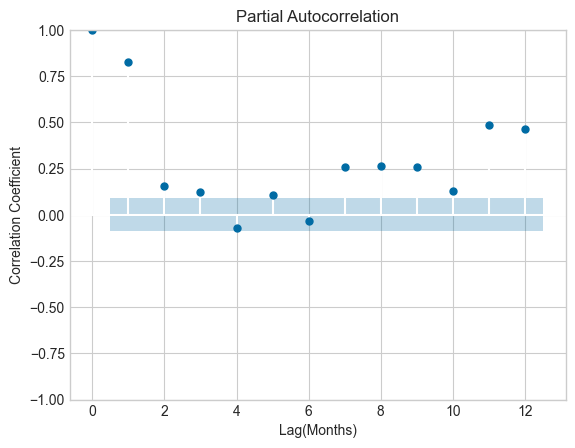

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df["Beer Production(ltr)"],lags=12)
plt.xlabel("Lag(Months)")
plt.ylabel("Correlation Coefficient")
plt.show()

In [36]:
# THE SERIES SEEMS TO BE HIGHLY CORRELATED WITH THE PREVIOUS MONTHLY VALUES
